In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import mean_absolute_error , mean_squared_error , mean_squared_log_error , r2_score

In [2]:
true = np.array([1,2,3,2,3,5,4,6,5,6,7,8,8]) # 실제값
preds = np.array([1,1,2,2,3,4,4,5,5,7,7,6,8]) # 예측값

MAE = mean_absolute_error(true , preds)
MSE = mean_squared_error(true , preds)
RMSE = np.sqrt(MSE)
MSLE = mean_squared_log_error(true , preds)
RMSLE = np.sqrt(mean_squared_log_error(true , preds))
R2 = r2_score(true, preds)


print(f'MAE :\t {MAE:.4f}')
print(f'MSE :\t {MSE:.4f}')
print(f'RMSE :\t {RMSE:.4f}')
print(f'MSLE :\t {MSLE:.4f}')
print(f'RMSLE :\t {RMSLE:.4f}')

MAE :	 0.5385
MSE :	 0.6923
RMSE :	 0.8321
MSLE :	 0.0296
RMSLE :	 0.1721


In [3]:
from sklearn.preprocessing import LabelEncoder #레이블 인코더

fruits = ['사과' , '블루베리' , '바나나' , '귤' , '블루베리' , '바나나' ,'바나나' , '사과']

label_encoder = LabelEncoder() # 레이블 인코더 생성

fruits_label_encoed = label_encoder.fit_transform(fruits)

print('레이블 인코딩 적용 후 데이터 ' , fruits_label_encoed)

레이블 인코딩 적용 후 데이터  [3 2 1 0 2 1 1 3]


In [4]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder #레이블 인코더 , 원 핫 인코더

fruits = ['사과' , '블루베리' , '바나나' , '귤' , '블루베리' , '바나나' ,'바나나' , '사과']

label_encoder = LabelEncoder() # 레이블 인코더 생성
onehot_encoder = OneHotEncoder()

fruits_label_encoed = label_encoder.fit_transform(fruits) # 레이블 인코더 적용

fruits_onehot_encoed = onehot_encoder.fit_transform(fruits_label_encoed.reshape(-1,1))
# reshape(-1,1) 메서드를 이용해 2차원으로 바꾸었다.
print('원-핫 인코딩 적용 후 데이터 ' , fruits_onehot_encoed.toarray())


원-핫 인코딩 적용 후 데이터  [[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


In [5]:
pd.get_dummies(fruits)

,귤,바나나,블루베리,사과
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,0,1,0
5,0,1,0,0
6,0,1,0,0
7,0,0,0,1


In [6]:
height_weight_dict = {'키' : [1.7 , 1.5 , 1.8] , '몸무게' : [75,55,60]}
df = pd.DataFrame(height_weight_dict , index = ['광일' , '혜성' , '덕수'])

print(df)

      키  몸무게
광일  1.7   75
혜성  1.5   55
덕수  1.8   60


In [7]:
from sklearn.preprocessing import MinMaxScaler

# min-max 정규화 객체 생성

scaler = MinMaxScaler()

# min-max 정규화 적용

df_scaled = scaler.fit_transform(df)
df_scaled

array([[0.66666667, 1.        ],
       [0.        , 0.        ],
       [1.        , 0.25      ]])

In [8]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# 표준화 적용

df_scaled = scaler.fit_transform(df)

df_scaled

array([[ 0.26726124,  1.37281295],
       [-1.33630621, -0.98058068],
       [ 1.06904497, -0.39223227]])

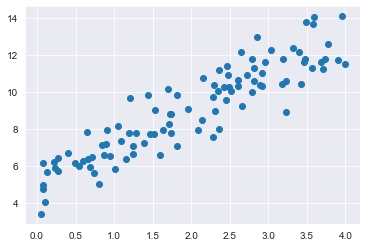

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0) # 시드값 고정

w0 = 5 # y 절편
w1 = 2 # 회귀 계수(쉐타)
noise = np.random.randn(100,1) # 노이즈 , 표준 정규분포를 따르는 데이터 100개를 생성하는 코드

x = 4 * np.random.rand(100, 1) # 0~4 사이 실숫값 100개 생성

y = w1 *x + w0 + noise # y = 2x + 5 에 근사하는 데이터
plt.scatter(x,y)

In [10]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression() # 선형 회귀 모델
linear_reg_model.fit(x, y) # 모델 훈련

print('y절편(w0) :' , linear_reg_model.intercept_)
print('회귀계수(w1) : ' , linear_reg_model.coef_)

y절편(w0) : [5.09772262]
회귀계수(w1) :  [[1.9808382]]


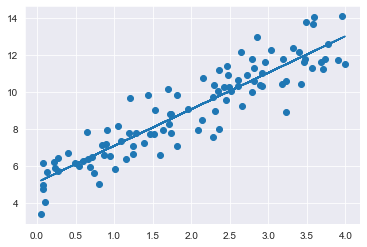

In [11]:
y_pred = linear_reg_model.predict(x) # 예측

plt.scatter(x,y)
plt.plot(x,y_pred) # 선형 회귀선 그리기

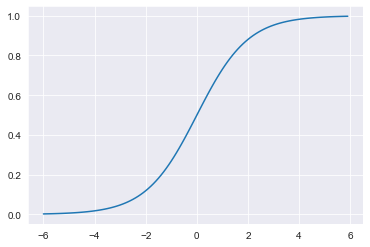

In [12]:
x = np.arange(-6,6,.1)

y = 1/ (1 + np.exp(-x))

plt.plot(x,y)
